In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
generator = Sequential()
generator.add(Dense(256, input_shape=(100,)))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(1024))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784, activation='tanh'))
generator.add(Reshape((28,28)))

optimizer = keras.optimizers.Adam(lr=0.0002, decay=8e-9)

generator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [3]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28,28)))
discriminator.add(Dense(784))

discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dense(784//2))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [4]:
discriminator.trainable = False
adversarial = Sequential()
adversarial.add(generator)
adversarial.add(discriminator)
adversarial.compile(loss='binary_crossentropy', optimizer=optimizer)

In [5]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
def plotn(n):
  noise = np.random.normal(0, 1, (n,100))
  imgs = generator.predict(noise)
  fig,ax = plt.subplots(1,n)
  for i,im in enumerate(imgs):
    ax[i].imshow(im.reshape(28,28))
  plt.show()

epoch: 1000, [Discriminator :: d_loss: 0.277009], [ Generator :: loss: 4.030892]


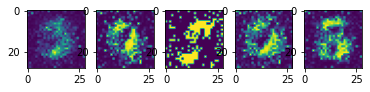

epoch: 2000, [Discriminator :: d_loss: 0.483209], [ Generator :: loss: 1.566584]


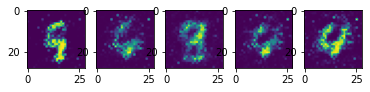

epoch: 3000, [Discriminator :: d_loss: 0.208092], [ Generator :: loss: 2.544434]


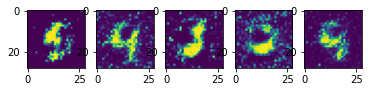

epoch: 4000, [Discriminator :: d_loss: 0.442364], [ Generator :: loss: 2.712534]


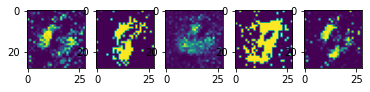

epoch: 5000, [Discriminator :: d_loss: 0.260871], [ Generator :: loss: 2.947989]


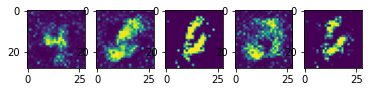

epoch: 6000, [Discriminator :: d_loss: 0.425409], [ Generator :: loss: 1.654004]


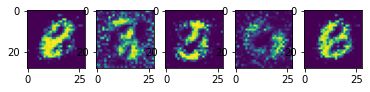

epoch: 7000, [Discriminator :: d_loss: 0.221764], [ Generator :: loss: 2.765890]


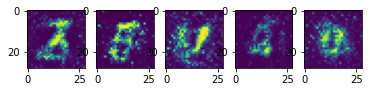

epoch: 8000, [Discriminator :: d_loss: 0.371700], [ Generator :: loss: 1.947046]


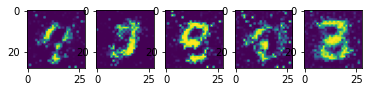

epoch: 9000, [Discriminator :: d_loss: 0.231305], [ Generator :: loss: 2.492253]


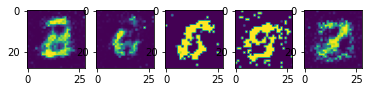

epoch: 10000, [Discriminator :: d_loss: 0.542636], [ Generator :: loss: 3.103190]


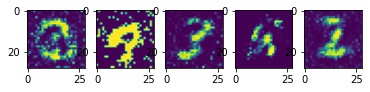

In [9]:
batch=32
for cnt in range(10000):
## train discriminator
    random_index =  np.random.randint(0, len(X_train) - batch//2)
    legit_images = X_train[random_index : random_index + batch//2].reshape(batch//2, 28, 28)
    gen_noise = np.random.normal(0, 1, (batch//2,100))
    syntetic_images = generator.predict(gen_noise)
    x_combined_batch = np.concatenate((legit_images, syntetic_images))
    y_combined_batch = np.concatenate((np.ones((batch//2, 1)), np.zeros((batch//2, 1))))
    d_loss = discriminator.train_on_batch(x_combined_batch, y_combined_batch)
    # train generator
    noise = np.random.normal(0, 1, (batch,100))
    y_mislabled = np.ones((batch, 1))
    g_loss = adversarial.train_on_batch(noise, y_mislabled)
    if (cnt+1)%1000==0:
        print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt+1, d_loss[0], g_loss))
        plotn(5)
